<a href="https://colab.research.google.com/github/Manjunath727/DL/blob/master/2/5_Iris_dataset_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step #200 A = [[-14.728892]], b = [[-66.050735]]
Step #400 A = [[-30.643883]], b = [[-130.65076]]
Step #600 A = [[-46.65388]], b = [[-195.9007]]
Step #800 A = [[-63.758884]], b = [[-264.80072]]
Step #1000 A = [[-80.62886]], b = [[-332.60062]]
Step #1200 A = [[-97.293846]], b = [[-399.2506]]
Step #1400 A = [[-113.77887]], b = [[-466.1006]]
Step #1600 A = [[-129.61392]], b = [[-529.95026]]
Step #1800 A = [[-145.66904]], b = [[-595.8506]]
Step #2000 A = [[-161.89409]], b = [[-661.8505]]


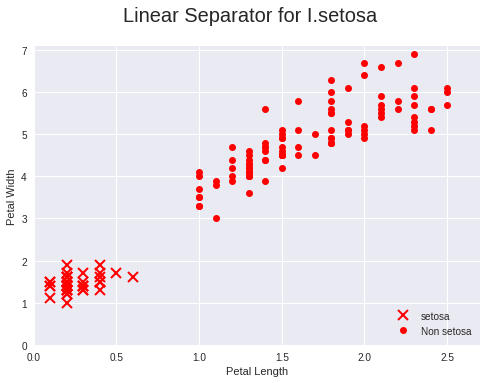

In [18]:
# Classifier on Iris dataset

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import tensorflow as tf

sess = tf.Session()

# Load the iris data. Transform the target data
# Use two features, petal length and petal width
iris = datasets.load_iris()
binary_target = np.array([1. if x==0 else 0. for x in iris.target])
iris_2d = np.array([[x[2], x[3]] for x in iris.data])

# Declare batch size, data placeholders, and model variables
batch_size = 20
x1_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
x2_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

# Define linear model <x2 = x1*A + b>
my_mult = tf.matmul(x2_data, A)
my_add = tf.add(my_mult, b)
my_output = tf.subtract(x1_data, my_add)

# Add Sigmoid cross-entropy loss function
xentropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=my_output, logits=y_target)

# Optimize the computational graph. Declare an optimizing method
# Learning rate = 0.05
my_opt = tf.train.GradientDescentOptimizer(0.05)
train_step = my_opt.minimize(xentropy)

# Variable Initialization Op and ask tf to run it.
init = tf.global_variables_initializer()
sess.run(init)


# Train our model. 1000 iterations. 
# Print variables every 200 iterations
for i in range(2000):
  rand_index = np.random.choice(len(iris_2d), size=batch_size)
  rand_x = iris_2d[rand_index]
  rand_x1 = np.array([[x[0]] for x in rand_x])
  rand_x2 = np.array([[x[1]] for x in rand_x])
  rand_y = np.array([[y] for y in binary_target[rand_index]])
  sess.run(train_step, feed_dict={x1_data: rand_x1, x2_data: rand_x2, y_target: rand_y})
  if (i+1)%200 == 0:
    print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + ', b = ' + str(sess.run(b)))

  

[[slope]] = sess.run(A)
[[intercept]] = sess.run(b)
x = np.linspace(0,3,num=50)
ablineValues = []
for i in x:
  ablineValues.append(slope*i + intercept)

setosa_x = [a[1] for i,a in enumerate(iris_2d) if binary_target[i] == 1]
setosa_y = [a[0] for i,a in enumerate(iris_2d) if binary_target[i] == 1]
non_setosa_x = [a[1] for i,a in enumerate(iris_2d) if binary_target[i] == 0]
non_setosa_y = [a[0] for i,a in enumerate(iris_2d) if binary_target[i] == 0]

plt.plot(setosa_x, setosa_y, 'rx', ms=10, mew=2, label='setosa')
plt.plot(non_setosa_x, non_setosa_y, 'ro', label = 'Non setosa')
plt.plot(x, ablineValues, 'b-')
plt.xlim([0.0, 2.7])
plt.ylim([0.0, 7.1])
plt.suptitle('Linear Separator for I.setosa', fontsize=20)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend(loc='lower right')
plt.show()